In [58]:
## my goal to understand the decision Tree
## undertand handle numerical values
## undertand handle catagorical values


In [59]:
## importing lib's
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [60]:
bank_df = pd.read_csv("Decision-Tree/bank.csv" , sep = ";") ## remember the sep ->> separator

In [118]:
print(bank_df.head(3))
print("\n")

# attributes
print("list of attributes : ",list(bank_df.columns))
print("\n")

## attibutes lenght
print("lenght of attributes : ",len(list(bank_df.columns))-1 )

## shape of the band df

print("shape of the bank df : ",bank_df.shape )

# try
features_2 = bank_df.drop(['y'], axis=1,inplace=True)

   age         job  marital  education default  balance housing loan  \
0   30  unemployed  married    primary      no     1787      no   no   
1   33    services  married  secondary      no     4789     yes  yes   
2   35  management   single   tertiary      no     1350     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  


list of attributes :  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


lenght of attributes :  16
shape of the bank df :  (4521, 17)


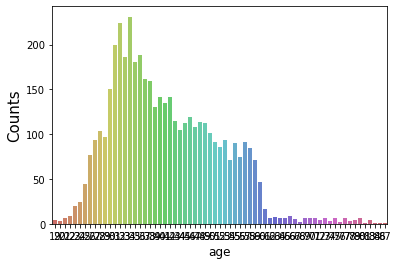

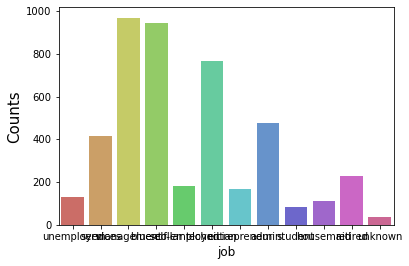

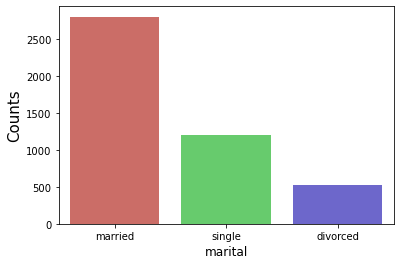

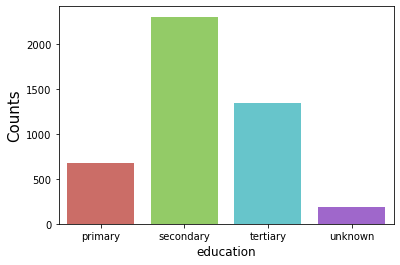

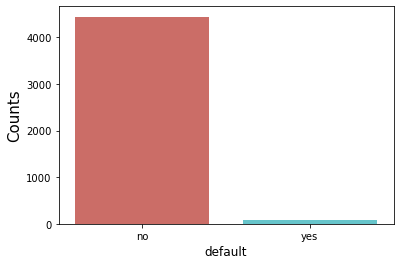

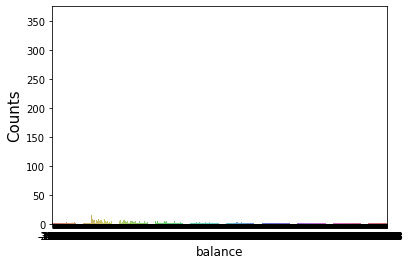

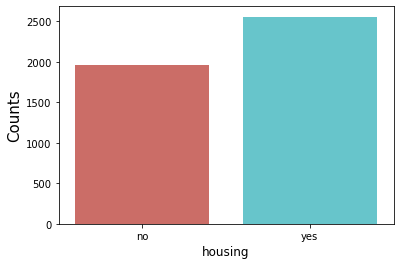

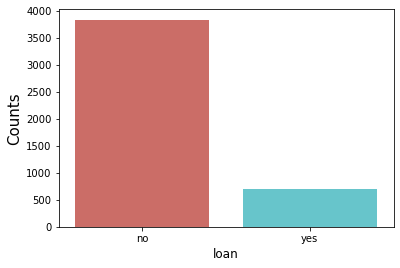

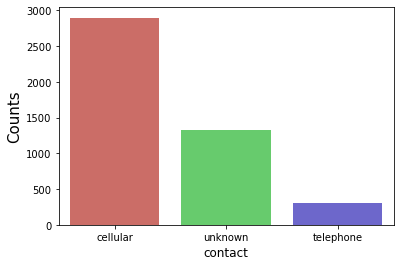

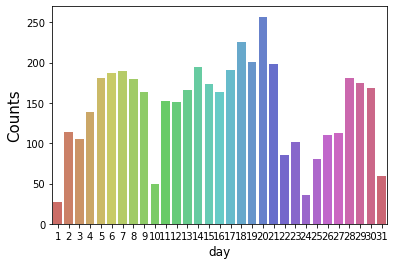

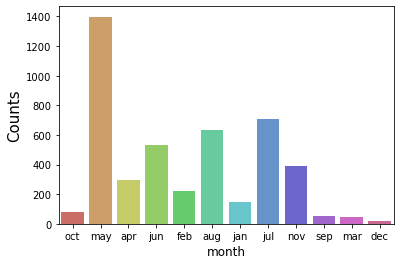

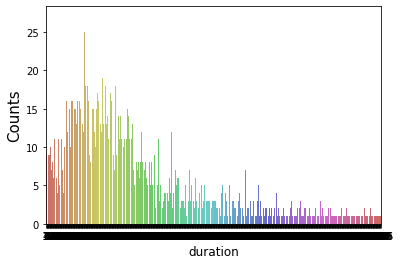

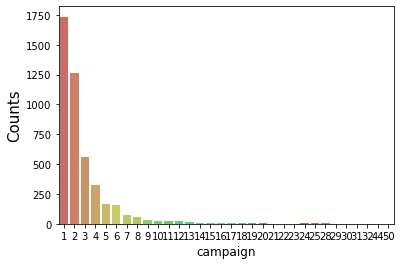

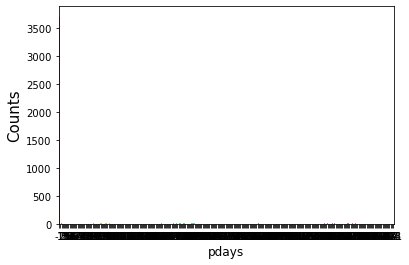

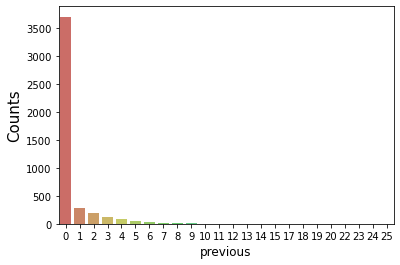

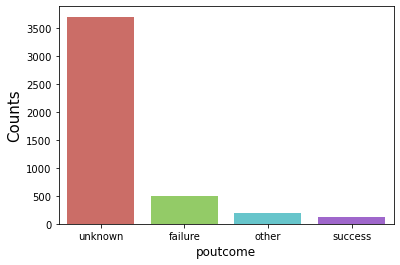

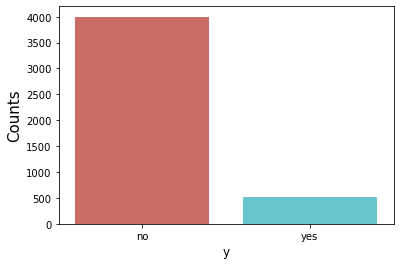

In [67]:
## checking in the dataframe ho many attributes distributed in yes or no
col = list(bank_df.columns)
for name in col:
    sns.countplot(x=name ,data=bank_df,palette='hls')
    plt.xlabel(name,fontsize=12)
    plt.ylabel("Counts",fontsize=15)
    plt.show()


In [69]:
## correlation plot by seaborn tell us the about the data similarity

# sns.heatmap(bank_df,center=0)

ValueError: could not convert string to float: 'unemployed'

In [70]:
bank_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [115]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

[[0.46198341 0.88387946 0.37354408 0.03297729 0.26758413]
 [0.49988822 0.49019528 0.48241924 0.9516676  0.19999476]
 [0.46188132 0.86085662 0.19559843 0.94413627 0.90936047]
 [0.85618536 0.47802879 0.72606534 0.18226216 0.10903988]
 [0.50703458 0.16164692 0.42704783 0.81833818 0.53386425]
 [0.93404819 0.91109383 0.90473529 0.62032263 0.50013557]
 [0.3689907  0.33889335 0.83403333 0.44712639 0.32586343]
 [0.35759968 0.76171028 0.36811213 0.90050176 0.93112256]
 [0.8682037  0.36844669 0.17674329 0.63479734 0.23598368]
 [0.76201201 0.02729    0.98527758 0.58493737 0.71884942]]
(10, 5)


<AxesSubplot:>

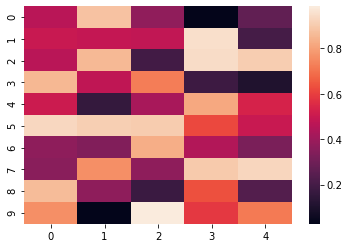

In [76]:
## understand the orking of the correlation lib

data = np.random.rand(10,5)
print(data)
print(data.shape)
sns.heatmap(data)

In [83]:
## finally convert categorical variable to dummy variable
# not so sure extacly poutcome does

cat_vars = ["job","marital","education","default","housing","loan","contact","month"]

bank_df_dummies = pd.get_dummies(bank_df,columns=cat_vars) ### imp point 


print("Check the colmns name  : ",bank_df_dummies.columns.tolist())
print("\n")
print("total number of columns :",len(list(bank_df_dummies)))

Check the colmns name  :  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']


total number of columns : 49


In [117]:
# bank_df_dummies
bank_df_dummies["education_unknown"]

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: education_unknown, Length: 4521, dtype: uint8

In [89]:
## Next step in select the features and labels


labels = bank_df_dummies[["y"]]
labels.head(3)


,y
0,no
1,no
2,no


In [90]:
features = bank_df_dummies.drop(['y'],axis=1)

In [91]:
features

,age,balance,day,duration,campaign,pdays,previous,poutcome,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1787,19,79,1,-1,0,unknown,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,4789,11,220,1,339,4,failure,0,0,...,0,0,0,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,failure,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,unknown,0,0,...,0,0,0,0,1,0,0,0,0,0
4,59,0,5,226,1,-1,0,unknown,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,unknown,0,0,...,0,0,0,1,0,0,0,0,0,0
4517,57,-3313,9,153,1,-1,0,unknown,0,0,...,0,0,0,0,0,0,1,0,0,0
4518,57,295,19,151,11,-1,0,unknown,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,28,1137,6,129,4,211,3,other,0,1,...,0,1,0,0,0,0,0,0,0,0


In [120]:
## split the data into train and test

from sklearn.model_selection import train_test_split

## stratify --> check the propotional of data from the orignal data!

x_train , x_test ,y_train,y_test = train_test_split(features,labels,test_size=0.2,train_size=0.8 , stratify=labels)

print("Number of the training samples : ",len(x_train) )
print("Number of the test samples ",len(x_test))


Number of the training samples :  3616
Number of the test samples  905


In [121]:
## Applying decision Tree classifier

# before apply the ML algorithm i have to understand the diffierence bt Normalizationa
# and standardization when we should do normialization and standardization
# Normalization
#     Normailzation is normalize your data into 1 and  0 from the real data .when we should 
#     apply it when we are determined the enculiden distance and manhatan distance
#     and it make sence if you are using Decison Tree then Normalization and standardization the
#     nothing help you because algorithm just building Tree depend on the values
# standardization
#     Standardization take your data convert it into the mean is zero and standard deviation
#     into the 1 it 

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [123]:
# pipe_steps = [("scaler" , StandardScaler()) , ("decsT" , DecisionTreeClassifier())]

# check_params = {
#     "decsT_criterion" : ['gini','entropy'],
#     "decT_max_depth" : np.arange(3,15)}

# pipe = Pipeline.fit(pipe_steps)
# print(pipeline)

## seems some error 

In [124]:
DST  =  DecisionTreeClassifier()
DST.fit(x_train,y_train)

ValueError: could not convert string to float: 'unknown'